In [272]:
# imports

#General
import numpy as np
import pandas as pd
import itertools
import pickle
from kneed import KneeLocator  # find knee in a plot

# System
import os, fnmatch

# Visualization
import seaborn as sns #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display, Image



# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics.cluster import adjusted_rand_score , rand_score

from numpy.random import seed
seed(1)


# Configurations
path='./data/'

## Load feature vectors and labels

In [245]:
with open('x.pkl', 'rb') as f:
    feature_vectors = pickle.load(f)
with open('y.pkl', 'rb') as f:
    classes_num = pickle.load(f)

## Standardization: Zero-Mean and Unit-Variance

In [248]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (1490, 82)


## Tune number of clusters in K means

In [250]:
# Function to calculate Sum of squared distances of samples to their closest cluster center
def cost_k_means(number_clusters):
    wcss=[]
    for i in number_clusters:
        kmeans = KMeans(
            n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=0.0001,
            verbose=0,
            random_state=42,
            algorithm='elkan')

        kmeans.fit(scaled_feature_vectors)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)
    return wcss

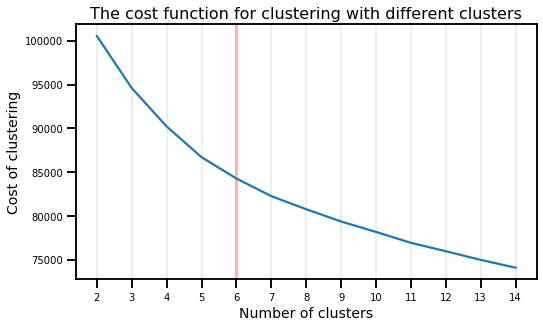

In [251]:
# Plot cost of clustering
number_clusters = range(2,15)
wcss = cost_k_means(number_clusters)

fig, axis = plt.subplots(figsize=(8,5))
axis.plot(number_clusters,wcss)
axis.set_title('The cost function for clustering with different clusters', fontsize=16)
axis.set_xlabel('Number of clusters', fontsize=14)
axis.set_ylabel('Cost of clustering', fontsize=14)
axis.grid(axis='x', alpha =0.3)
plt.xticks(number_clusters)
axis.tick_params(axis='x', labelsize=10)
axis.tick_params(axis='y', labelsize=10)
a = axis.get_xgridlines()
b = a[4]
b.set_color('red')
b.set_linewidth(3)
plt.savefig('cost_in_kmeans.jpg')
plt.tight_layout()

In [252]:
# Find knee in the cost vs # of cluster plot 
kl = KneeLocator(number_clusters, wcss, curve="convex", direction="decreasing")
kl.knee

6

## Plot clusters using LDA

In [254]:
# Tuned K means
kmeans = KMeans(
    n_clusters=6,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=4,
    algorithm='elkan')
kmeans.fit(scaled_feature_vectors)
identified_clusters = kmeans.fit_predict(scaled_feature_vectors)

In [255]:
# Use LDA to find xy axis for best discrimenant axis for ploting the clusters
clf = LinearDiscriminantAnalysis(n_components=2)
xy=clf.fit(scaled_feature_vectors, identified_clusters).transform(scaled_feature_vectors)

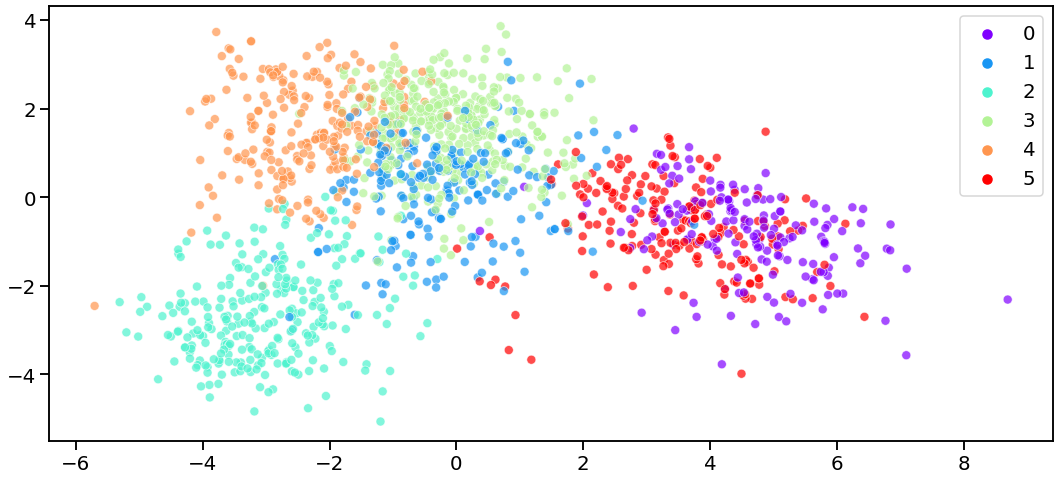

In [256]:
# plot cluster in 2D
fig, axis = plt.subplots(figsize=(18,8) )
sns.scatterplot(
    x=xy[:,0],
    y=xy[:,1],
    hue=identified_clusters,
    palette='rainbow',
    alpha=0.7,
    edgecolors='b',
    sizes=2,
    legend= 'brief',
)
plt.savefig('clustering_kmeans.jpg')
plt.show()

In [273]:
# metric for clustering
adjusted_rand_score(identified_clusters, classes_num)

0.3434571596450047

In [274]:
rand_score(identified_clusters, classes_num)

0.812427601065532